<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I used the world Happiness index report from Kaggle as a toy data to practice clustering in Unsupervised machine learning algorithm, specifically KMeans algorithm. In addition to KMeans algorithm i have shown a number of ML techniques and processes:
* Labelled countries
* showed correlation heatmap amongst features
* preprocessed the data, 
* using elabow method found the optimum number of clusters,
* Worked out the optimum number of components using explained_variance_ratio, hence the number of optimum dimentions when applying PCA dimentional recuction technique.
* used plotly to visualise the results

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [87]:
# os.chdir("sample_data")
# os.listdir()

In [88]:
df = pd.read_csv("world-happiness-report.csv", header=0)

df.head(2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237


# EDA

In [89]:
# rearrange the columns
df = df[[ 'year', 'Country name', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']]
df.head(2)       

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,Afghanistan,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,2009,Afghanistan,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237


In [21]:
print(f"The data frame is {df.shape[0]} rows by {df.shape[1]} columns\n")
print(f"The number of rows with null values per columns are:\n{df.isnull().sum()}")

The data frame is 1949 rows by 11 columns

The number of rows with null values per columns are:
year                                  0
Country name                          0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


In [22]:
df[df['Perceptions of corruption'].isnull()].head()

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
28,2014,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,2016,Algeria,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
112,2014,Bahrain,6.165,10.783,NaN,67.42,NaN,NaN,NaN,NaN,NaN
113,2015,Bahrain,6.007,10.785,0.853,67.70,0.850,0.112,NaN,0.716,0.303
114,2016,Bahrain,6.170,10.781,0.863,68.10,0.889,0.088,NaN,0.787,0.283


### Tasks
  * Find correlation among features
  * Find out the most happy and unhappy countries per year
  * What is the average happiness score per continent and world

In [52]:
# import relevant libraries
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, download_plotlyjs,plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
# import chart_studio.plotly as py
from plotly.subplots import make_subplots
%matplotlib inline

import cufflinks as cf
cf.go_offline()

# with out the codes below plotly plots can't be displayed inline
import plotly.io as pio
pio.renderers.default = 'colab'

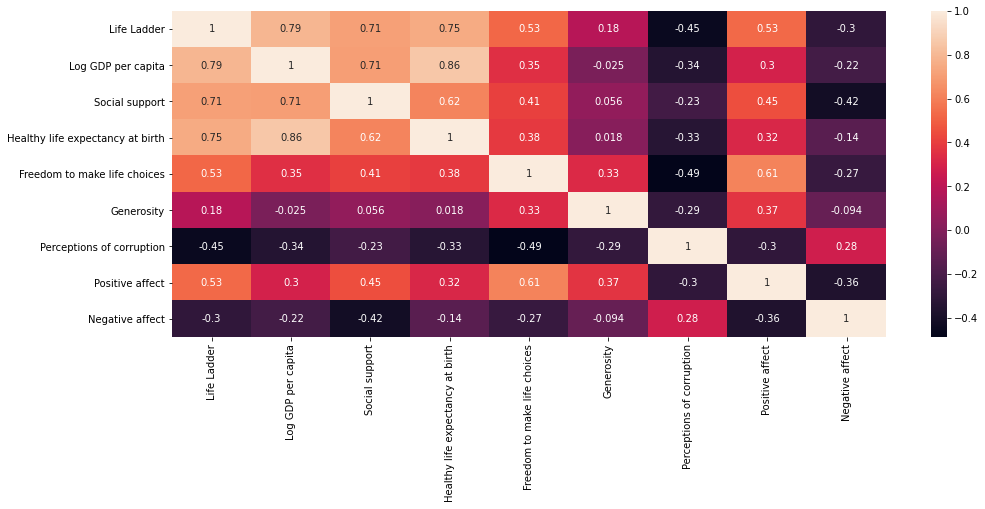

In [66]:
#correlation with seaborn
plt.figure(figsize=(16,6))
sns.heatmap(df.drop(['Country name','year'], 1).dropna(how='any').corr(), annot=True)
plt.show()

In [62]:
#Correlation with plotly
fig = px.scatter_matrix(df.drop(['Country name', 'year'], axis=1).dropna(how='any'),
                  dimensions=['Life Ladder','Log GDP per capita','Social support', 'Generosity', 'Perceptions of corruption'],
                  color='Life Ladder',
                  width=1400,
                  height=800)
fig.show()

## Conclusion
  *the lower the perception of corruption the higher is the Life ladder (a measure of happiness index), hence an inverse relationship*

  *generosity has a neutral effect on happiness index, people are happy wether they give little or a lot, the giving is what makes them happy*

  *the more social support the better is Life ladder*

  *the higher is the GDP the happier people are, positive linear relationship with Life ladder*

### Happy and Unhappy Indicators

In [5]:
!pip install a-world-of-countries

     |████████████████████████████████| 92kB 4.8MB/s 


In [6]:
import awoc
countries = awoc.AWOC()

In [91]:
# get the list of countries in the dataframe and from awoc
cntry_lst = df['Country name'].str.lower().unique()
missing_cntry = [cntry for cntry in cntry_lst  if cntry not in [country.lower() for country in countries.get_countries_list()]]
matching_cntry = [cntry for cntry in cntry_lst  if cntry in [country.lower() for country in countries.get_countries_list()]]

# use apply lambda to assign continent on 'Country name' column
df['Continent'] = df.loc[df['Country name'].str.lower().isin(matching_cntry)]['Country name'].str.lower().apply(lambda x: countries.get_country_continent_name(x.lower()))

In [92]:
df.head(2)

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent
0,2008,Afghanistan,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258,Asia
1,2009,Afghanistan,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237,Asia


In [10]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America', nan], dtype=object)

In [104]:
# comparing what is missing and what is not populated on the data frame
print(df.loc[df['Continent'].isnull()]['Country name'].unique())
print("\n", missing_cntry)

['Congo (Brazzaville)' 'Congo (Kinshasa)' 'Hong Kong S.A.R. of China'
 'North Cyprus' 'North Macedonia' 'Palestinian Territories'
 'Somaliland region' 'Taiwan Province of China']

 ['congo (brazzaville)', 'congo (kinshasa)', 'hong kong s.a.r. of china', 'north cyprus', 'north macedonia', 'palestinian territories', 'somaliland region', 'taiwan province of china']


In [93]:
# better assign Continent manually on the missing than wasting too much time...get it done ...dont sacrifice productivity for perfection
df.loc[df['Country name']=='Somaliland region', 'Continent']='Africa'
df.loc[df['Country name']=='Congo (Brazzaville)', 'Continent']='Africa'
df.loc[df['Country name']=='Congo (Kinshasa)', 'Continent']='Africa'
df.loc[df['Country name']=='Hong Kong S.A.R. of China', 'Continent']='Asia'
df.loc[df['Country name']=='North Cyprus', 'Continent']='Europe'
df.loc[df['Country name']=='North Macedonia', 'Continent']='Europe'
df.loc[df['Country name']=='Palestinian Territories', 'Continent']='Asia'
df.loc[df['Country name']=='Taiwan Province of China', 'Continent']='Asia'


In [94]:
print(f" Missing Continents are = {df['Continent'].isnull().sum()}")

 Missing Continents are = 0


In [13]:
df[1003:1005]

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Continent
1003,2008,Lithuania,5.554,10.199,0.914,63.82,0.621,-0.259,0.961,0.533,0.276,Europe
1004,2009,Lithuania,5.467,10.050,0.933,64.16,0.496,-0.303,0.979,0.526,0.271,Europe


In [14]:
# Average Happines index by Continent by year
df.groupby(['Continent', 'year'])['Life Ladder'].mean()

Continent      year
Africa         2005    5.168000
               2006    4.074182
               2007    4.435857
               2008    4.296296
               2009    4.421240
                         ...   
South America  2016    5.921400
               2017    5.917100
               2018    5.945111
               2019    5.964500
               2020    5.708500
Name: Life Ladder, Length: 95, dtype: float64

In [75]:
fig = go.Figure(data=go.Scatter(
        x=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Africa'].index,
        y=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Africa'].values,
        mode='lines+markers',
        name='Africa',
        marker_color='red',
        marker_size=6
    )
) 
fig.add_trace(go.Scatter(
          x=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Asia'].index,
          y=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Asia'].values,
          name='Asia',
          # mode='lines+markers',
          line=dict(color='darkorange', width=2, dash='dot'),
          # marker_color='blue',
          marker_size=6
      )
  ) 
fig.add_trace(go.Scatter(
          x=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['North America'].index,
          y=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['North America'].values,
          name='North America',
          # mode='lines+markers',
          # marker_color='cyan',
          line=dict(dash='dash', color='royalblue', width=2),
          marker_size=6
      )
  ) 
fig.add_trace(go.Scatter(
          x=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['South America'].index,
          y=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['South America'].values,
          name='South America',
          mode='lines+markers',
          marker_color='purple',
          marker_size=6
      )
  ) 
fig.add_trace(go.Scatter(
          x=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Europe'].index,
          y=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Europe'].values,
          name='Europe',
          mode='lines+markers',
          marker_color='darkgreen',
          marker_size=6
      )
  ) 
fig.add_trace(go.Scatter(
          x=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Oceania'].index,
          y=df.groupby(['Continent', 'year'])['Life Ladder'].mean()['Oceania'].values,
          name='Oceania',
          mode='lines+markers',
          marker_color='limegreen',
          # dash='dot',
          marker_size=6
      )
  ) 
fig.update_yaxes(range=[2,8])
# fig.update_xaxes(range=[2005,2021])

fig.show()

# PreProcessing, Decomposing and K-Means Clustering
  
> * pre_processing the data*
> * Instantiate a kmeans classifiers and create a cluster*
> * use elbow method to figure out the optimum cluster number*



#### Libraries

In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [96]:
# remove null values
df = df.dropna(how='any')
df.shape

(1708, 12)

In [14]:
df.columns

Index(['year', 'Country name', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Continent'],
      dtype='object')

In [97]:
# determine the target and the features, also categorise happiness
X = df.drop(['Life Ladder', 
             'Country name', 'year', 
             'Negative affect','Positive affect', 
             'Continent', 'Generosity', 'Perceptions of corruption', 'Healthy life expectancy at birth',
             'Freedom to make life choices'], axis=1)
y = pd.cut(df['Life Ladder'], bins=[0,4.5, 6.5, 10], labels=['unhappy', 'neutral', 'happy'])

In [98]:
print(X.shape, y.shape)
X.columns

(1708, 2) (1708,)


Index(['Log GDP per capita', 'Social support'], dtype='object')

In [99]:
print(f"Countries per Category: \n{y.value_counts()}")

Countries per Category: 
neutral    976
unhappy    386
happy      346
Name: Life Ladder, dtype: int64


In [100]:
#preprocessing
mms = MinMaxScaler()
ss = StandardScaler()

In [42]:
# MinMaxScaler scaled down values between 0 and 1, while StandardScaler scales down to unit variance
# sns.histplot(mms.fit_transform(X)[:,1])
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x = mms.fit_transform(X)[:,0],
              name = 'col0'), 
              row=1, col=1)

fig.add_trace(go.Histogram(x = mms.fit_transform(X)[:,1], 
              name = 'col1', opacity=0.75),
              row=1, col=2)

fig.update_layout(
    title_text='Min Max Scaled distribution for the first two columns'
)


In [101]:
#Dimensioanlity Reduction : PCA

pca = PCA(n_components=2)
# pca = PCA(0.85)

In [102]:
mms_X = mms.fit_transform(X)
mms_X.shape

(1708, 2)

In [103]:
ss_X = ss.fit_transform(X)
ss_X.shape

(1708, 2)

In [104]:
#scale, reduce dimension and create a dataframe
pd.DataFrame(pca.fit_transform(mms_X), columns=['pc1', 'pc2']).head(2)

,pc1,pc2
0,0.611154,0.209369
1,0.501957,0.108255


In [105]:
# concatenate target with pcs
dimReduced_df = pd.concat([pd.DataFrame(pca.fit_transform(mms_X), columns=['pc1', 'pc2']),
                       pd.DataFrame(y)], axis=1).dropna(how='any')
dimReduced_df.tail(1)

,pc1,pc2,Life Ladder
1707,0.321703,-0.055673,unhappy


In [106]:
# concatenate target with pcs
ss_dimReduced_df = pd.concat([pd.DataFrame(pca.fit_transform(ss_X), columns=['pc1', 'pc2']),
                       pd.DataFrame(y)], axis=1).dropna(how='any')
ss_dimReduced_df.tail(1)

,pc1,pc2,Life Ladder
1707,1.454142,0.368828,unhappy


In [107]:
# Using Min Max Scaler
fig = px.scatter(dimReduced_df, 
                 x = 'pc1', 
                 y = 'pc2',
                 color = 'Life Ladder'
                 )

fig.update_layout(
    title = 'Happiness index scatter plot as per Principal components based on Min Max Scaler'
)
fig.show()

In [108]:
# Using Standard Scaler
fig = px.scatter(ss_dimReduced_df, 
                 x = 'pc1', 
                 y = 'pc2',
                 color = 'Life Ladder'
                 )

fig.update_layout(
    title = 'Happiness index scatter plot as per Principal components based on Standar Scaler'
)
fig.show()

In [109]:
# kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [110]:
# list of clusters per unique result
y_pred = kmeans.fit_predict(df[['Log GDP per capita', 'Social support']])
print(set(y_pred))
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0, 1, 2}


{0: 570, 1: 527, 2: 611}

In [111]:
#or like this
pd.DataFrame(dict(enumerate(np.unique(y_pred, return_counts=True)))).rename(columns={0:'unique', 1:'counts'})

,unique,counts
0,0,570
1,1,527
2,2,611


In [112]:
X['predicted'] = y_pred
X.head()

,Log GDP per capita,Social support,predicted
0,7.370,0.451,1
1,7.540,0.552,1
2,7.647,0.539,1
3,7.620,0.521,1
4,7.705,0.521,1


In [113]:
# Using Standard Scaler
fig = px.scatter(X, 
                 x = 'Log GDP per capita', 
                 y = 'Social support',
                 color = 'predicted'
                 )
fig.add_trace(go.Scatter(x=pd.DataFrame(kmeans.cluster_centers_)[0],
                         y=pd.DataFrame(kmeans.cluster_centers_)[1],
                         mode='markers',
                         marker=dict( color='green', symbol='star',
                                      size=20
            )
    ))

fig.update_layout(
    title = 'Happiness index scatter plot Based on the raw data without scalling'
)
fig.show()

# Second Scenario
* In this case we will leave the Country name, Drop Life Ladder (the Target) and continent, preprocess, decompose and cluster

In [14]:
X = df.dropna(how='any').drop(['year', 'Life Ladder', 'Continent'], axis=1)  
X.head(1)

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258


In [15]:
#instantiate
le = LabelEncoder()

## Label Enconding

In [16]:
#Label countries
X['Country name'] = le.fit_transform(X['Country name'])

In [17]:
X.loc[100,:]

Country name                         8.000
Log GDP per capita                   9.592
Social support                       0.770
Healthy life expectancy at birth    64.120
Freedom to make life choices         0.672
Generosity                          -0.168
Perceptions of corruption            0.699
Positive affect                      0.619
Negative affect                      0.242
Name: 100, dtype: float64

In [ ]:
#Country mapping
{index:label for index, label in enumerate(le.classes_)}

## Preprocessing


In [19]:
#instantiate
mms = MinMaxScaler()

In [20]:
#scaled used MinMaxScaler
scaled_X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)
scaled_X.head(1)

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,0.0,0.146619,0.23099,0.412946,0.632737,0.491211,0.89346,0.315113,0.268412


## Elbow method: figuring out the number of clusters

In [21]:
# using SSE for 1 to max range 50 find the elbow
rng = range(1,50)
sse=[]
for k in rng:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_X)
  sse.append(kmeans.inertia_)

In [73]:
#Visualize
fig = px.line( x=rng, y=sse, title='Elbow method', labels={'x':'number of clusters', 'y':'sumn sqaured error'})
fig.show()

In [25]:
# For demonstration purpose we use 10 clusters 
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_X)
clusters = kmeans.predict(scaled_X) # this will be appended in the decomposed data for visaulisation

In [81]:
print(f"the clusters are: {set(clusters)}")

the clusters are: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [117]:
# pd.DataFrame(np.unique(clusters, return_counts=True))
unique, counts = np.unique(clusters, return_counts=True)
dict(zip(unique, counts))

{0: 151,
 1: 125,
 2: 183,
 3: 277,
 4: 152,
 5: 108,
 6: 273,
 7: 109,
 8: 218,
 9: 112}

## decomposition: dimenstional reduction

In [123]:
print(f"current number of dimensions to be reduced are: {scaled_X.shape[1]}")

current number of dimensions to be reduced are: 9


In [22]:
#first lets use just 2 components for demonstration purposes
pca = PCA(n_components=2)

In [23]:
dimReduced_X  = pd.DataFrame(pca.fit_transform(scaled_X), columns=['pc1', 'pc2'])
dimReduced_X.head(2)

,pc1,pc2
0,0.705722,-0.398104
1,0.596907,-0.397649


In [26]:
#append clusters on dimReduced_X
dimReduced_X['cluster'] = clusters
dimReduced_X.tail(3)

,pc1,pc2,cluster
1705,0.17955,0.547750,2
1706,0.26223,0.549336,2
1707,0.30336,0.541751,5


In [27]:
#10 dimensional cluster centroids
kmeans.cluster_centers_

array([[0.22356215, 0.83928215, 0.93628305, 0.87904974, 0.89788023,
        0.47160121, 0.42296753, 0.78038872, 0.18427052],
       [0.25191593, 0.65242666, 0.83790196, 0.7837235 , 0.73306244,
        0.25484485, 0.79186608, 0.71155397, 0.29441395],
       [0.723644  , 0.26509194, 0.71346949, 0.46217844, 0.54792459,
        0.30558938, 0.82419955, 0.62625307, 0.18980456],
       [0.77282138, 0.62315877, 0.84175972, 0.76687371, 0.77199829,
        0.32941293, 0.8114719 , 0.73523929, 0.25377144],
       [0.18855985, 0.58881304, 0.68201299, 0.72614308, 0.45099396,
        0.18098129, 0.81546803, 0.42533844, 0.3567296 ],
       [0.75351732, 0.2089883 , 0.49576758, 0.51528181, 0.62561898,
        0.37013346, 0.73642757, 0.49970525, 0.41597109],
       [0.70042644, 0.62672871, 0.77389951, 0.74459266, 0.48145791,
        0.22098492, 0.88496337, 0.44333797, 0.32740553],
       [0.19639794, 0.22309542, 0.48266154, 0.44145328, 0.53497184,
        0.3374914 , 0.80436802, 0.47615725, 0.35068812],


In [28]:
#from 10 dimensional centroids to 2 dimensional ccentroids
dimReducedCenters = pca.transform(kmeans.cluster_centers_)
dimReducedCenters

array([[-0.56181933, -0.32647071],
       [-0.14165928, -0.2717527 ],
       [ 0.27655183,  0.29027961],
       [-0.20932439,  0.25189548],
       [ 0.20620687, -0.32737113],
       [ 0.37756478,  0.3051668 ],
       [ 0.081838  ,  0.17367172],
       [ 0.5230418 , -0.23027755],
       [-0.65689709,  0.19613671],
       [ 0.07280337, -0.0874302 ]])

In [29]:
dimReducedCenters[:,1]

array([-0.32647071, -0.2717527 ,  0.29027961,  0.25189548, -0.32737113,
        0.3051668 ,  0.17367172, -0.23027755,  0.19613671, -0.0874302 ])

In [154]:
# visualistions
dimReduced_X['cluster'] = dimReduced_X['cluster'].astype(str)
fig = px.scatter(dimReduced_X, 
                 x = 'pc1', 
                 y = 'pc2',
                 color = 'cluster',
                 color_discrete_sequence=px.colors.qualitative.Bold_r , template='plotly_dark'
                 )
fig.add_trace(go.Scatter(x=dimReducedCenters[:,0],
                         y=dimReducedCenters[:,1],
                         mode='markers',
                         marker=dict( color='cyan', symbol='star',
                                      size=20),
                         name='Centroid'
                        )
)

fig.update_layout(
    title = 'Cluster visualization with Centroids'
)
fig.show()

## Principal components Explained Variance

In [32]:
#lets instantiate and calculate the percentage of variation per PCA
pca= PCA()

In [35]:
pca.fit(scaled_X)
pcaTransformed_X = pca.transform(scaled_X)

In [44]:
#percentages of variation per PCA
np.round(pca.explained_variance_ratio_*100, decimals=2)

array([36.42, 24.46, 14.32,  7.8 ,  5.43,  4.85,  3.02,  2.32,  1.37])

In [48]:
#to plot create a list of PCA names
[f'pc{i}' for i in range(len(pca.explained_variance_ratio_))]

['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8']

In [66]:
fig = go.Figure([go.Bar(
    x= [f'pc{i}' for i in range(len(pca.explained_variance_ratio_))],
    y= np.round(pca.explained_variance_ratio_*100, decimals=2),
    marker_color='lightsalmon'
                        )
                ]
                )
fig.update_layout(template='plotly_dark',
                 yaxis_title = '%',
                 title='Percentages of Variance per Prinicipal Components')
fig.show()

In [84]:
for i in range(2, 10):
  print(f"Percentage of variation for {i} dimensions/PCs is {np.round(pca.explained_variance_ratio_[:i].sum()*100, decimals=2)}%")

Percentage of variation for 2 dimensions/PCs is 60.88%
Percentage of variation for 3 dimensions/PCs is 75.2%
Percentage of variation for 4 dimensions/PCs is 83.0%
Percentage of variation for 5 dimensions/PCs is 88.43%
Percentage of variation for 6 dimensions/PCs is 93.28%
Percentage of variation for 7 dimensions/PCs is 96.31%
Percentage of variation for 8 dimensions/PCs is 98.63%
Percentage of variation for 9 dimensions/PCs is 100.0%


# conclusion
To be above 85% threshold for acceptable dimensional reduction and retain most of the information we will need to have at least 5 dimensions retained. Hence, the PCA(n_components=5).